In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

*La tabla PASI contiene el histórico de cada persona en el programa sobre la clinimetría PASI, incluye el resultado total (que alimenta la tabla Resultados generales) y en la mayoría de los casos el detalle por área afectada para cada uno de los tres indicadores - Eritema, Induración y Descamación, registradas cada consulta*<br>
***Nota1: No todas las áreas evaluadas cuentan con los tres indicadores***<br>
***Nota2: Existen duplicados (ID-Fecha) que se producen por error del sistema o porque el médico ajusta algún valor, por lo cual se debe tomar el último valor (de acuerdo al orden/index original o Fecha que es datetime)***

In [14]:
df_PASI = pd.read_excel("data/PASI..xlsx")
print(df_PASI.columns)

Index(['ID', 'Fecha', 'Resultado Total', 'Pregunta', 'Respuesta',
       'Sede de atención'],
      dtype='object')


In [107]:
df_PASI.head(12)

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
0,1965149,2018-05-15 08:24:24,3.0,Eritema (enrojecimiento),1,NaN
1,1965149,2018-05-15 08:24:24,3.0,Induración (espesor),1,NaN
2,1965149,2018-05-15 08:24:24,3.0,Descamación (escalado),1,NaN
3,1965149,2018-05-15 08:24:24,3.0,Area -> Cabeza,<10%,NaN
4,1965149,2018-05-15 08:24:24,3.0,Eritema (enrojecimiento),0,NaN
5,1965149,2018-05-15 08:24:24,3.0,Induración (espesor),0,NaN
6,1965149,2018-05-15 08:24:24,3.0,Descamación (escalado),0,NaN
7,1965149,2018-05-15 08:24:24,3.0,Area -> Brazos,0,NaN
8,1965149,2018-05-15 08:24:24,3.0,Eritema (enrojecimiento),2,NaN
9,1965149,2018-05-15 08:24:24,3.0,Induración (espesor),2,NaN


In [103]:
dup=df_PASI[['ID','Fecha','Pregunta','Resultado Total']].groupby(['ID','Fecha','Pregunta']).count()#.sort_values(by='ID',ascending=False)
dup

Resultado Total
ID       Fecha               Pregunta                                 
501053   2019-03-04 13:57:31 Area -> Brazos                          1
                             Area -> Cabeza                          1
                             Area -> Piernas                         1
                             Area -> Tronco                          1
                             Descamación (escalado)                  1
...                                                                ...
20946751 2018-12-13 07:48:35 Area -> Piernas                         2
                             Area -> Tronco                          2
                             Descamación (escalado)                  2
                             Eritema (enrojecimiento)                2
                             Induración (espesor)                    2

[44753 rows x 1 columns]

In [105]:
All = slice(None)
dup.loc[(20946751,All,All),(All)]

Resultado Total
ID       Fecha               Pregunta                                 
20946751 2018-12-13 07:48:35 Area -> Brazos                          2
                             Area -> Cabeza                          2
                             Area -> Piernas                         2
                             Area -> Tronco                          2
                             Descamación (escalado)                  2
                             Eritema (enrojecimiento)                2
                             Induración (espesor)                    2

In [106]:
df_PASI.loc[(df_PASI['ID']==20946751)]

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
12556,20946751,2018-12-13 07:48:35,0.0,Eritema (enrojecimiento),0,Almacentro Piso 11
12557,20946751,2018-12-13 07:48:35,0.0,Induración (espesor),0,Almacentro Piso 11
12558,20946751,2018-12-13 07:48:35,0.0,Descamación (escalado),0,Almacentro Piso 11
12559,20946751,2018-12-13 07:48:35,0.0,Area -> Cabeza,0,Almacentro Piso 11
12560,20946751,2018-12-13 07:48:35,0.0,Area -> Brazos,0,Almacentro Piso 11
12561,20946751,2018-12-13 07:48:35,0.0,Area -> Tronco,0,Almacentro Piso 11
12562,20946751,2018-12-13 07:48:35,0.0,Area -> Piernas,0,Almacentro Piso 11
25708,20946751,2018-12-13 07:48:35,0.0,Eritema (enrojecimiento),0,Almacentro Piso 11
25709,20946751,2018-12-13 07:48:35,0.0,Induración (espesor),0,Almacentro Piso 11
25710,20946751,2018-12-13 07:48:35,0.0,Descamación (escalado),0,Almacentro Piso 11


In [16]:
df_PASI.shape

(76014, 6)

In [115]:
IDs_Unicos=df_PASI[['ID','Fecha','Pregunta','Resultado Total']].copy()
IDs_Unicos=df_PASI.drop_duplicates(keep="last")
IDs_Unicos

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
13152,1965149,2018-05-15 08:24:24,3.0,Eritema (enrojecimiento),1,NaN
13153,1965149,2018-05-15 08:24:24,3.0,Induración (espesor),1,NaN
13154,1965149,2018-05-15 08:24:24,3.0,Descamación (escalado),1,NaN
13155,1965149,2018-05-15 08:24:24,3.0,Area -> Cabeza,<10%,NaN
13156,1965149,2018-05-15 08:24:24,3.0,Eritema (enrojecimiento),0,NaN
...,...,...,...,...,...,...
76009,833906,2020-05-29 16:35:39,0.8,Induración (espesor),0,Almacentro Piso 11
76010,833906,2020-05-29 16:35:39,0.8,Descamación (escalado),0,Almacentro Piso 11
76011,833906,2020-05-29 16:35:39,0.8,Area -> Brazos,0,Almacentro Piso 11
76012,833906,2020-05-29 16:35:39,0.8,Area -> Tronco,0,Almacentro Piso 11


In [116]:
dup2=IDs_Unicos[['ID','Fecha','Pregunta','Resultado Total']].groupby(['ID','Fecha','Pregunta']).count()#.sort_values(by='ID',ascending=False)
dup2

Resultado Total
ID       Fecha               Pregunta                                 
501053   2019-03-04 13:57:31 Area -> Brazos                          1
                             Area -> Cabeza                          1
                             Area -> Piernas                         1
                             Area -> Tronco                          1
                             Descamación (escalado)                  1
...                                                                ...
20946751 2018-12-13 07:48:35 Area -> Piernas                         1
                             Area -> Tronco                          1
                             Descamación (escalado)                  1
                             Eritema (enrojecimiento)                1
                             Induración (espesor)                    1

[44753 rows x 1 columns]

In [117]:
dup2.loc[(20946751,All,All),(All)]

Resultado Total
ID       Fecha               Pregunta                                 
20946751 2018-12-13 07:48:35 Area -> Brazos                          1
                             Area -> Cabeza                          1
                             Area -> Piernas                         1
                             Area -> Tronco                          1
                             Descamación (escalado)                  1
                             Eritema (enrojecimiento)                1
                             Induración (espesor)                    1

In [118]:
IDs_Unicos.loc[(IDs_Unicos['ID']==20946751)]

,ID,Fecha,Resultado Total,Pregunta,Respuesta,Sede de atención
25708,20946751,2018-12-13 07:48:35,0.0,Eritema (enrojecimiento),0,Almacentro Piso 11
25709,20946751,2018-12-13 07:48:35,0.0,Induración (espesor),0,Almacentro Piso 11
25710,20946751,2018-12-13 07:48:35,0.0,Descamación (escalado),0,Almacentro Piso 11
25711,20946751,2018-12-13 07:48:35,0.0,Area -> Cabeza,0,Almacentro Piso 11
25712,20946751,2018-12-13 07:48:35,0.0,Area -> Brazos,0,Almacentro Piso 11
25713,20946751,2018-12-13 07:48:35,0.0,Area -> Tronco,0,Almacentro Piso 11
25714,20946751,2018-12-13 07:48:35,0.0,Area -> Piernas,0,Almacentro Piso 11


In [119]:
print(IDs_Unicos.shape)
print(df_PASI.shape)

(62862, 6)
(76014, 6)


In [149]:
#IDs_Unicos.pivot(values='index',index='ID',columns='Resultado Total')
table=pd.pivot_table(IDs_Unicos,values='Fecha',index='ID',columns='Pregunta',aggfunc='max')
table
#dup.loc[(20946751,All,All),(All)]
#table.iloc[(0),(6)]
#table.iloc[(0),(All)]
#df_IDs_Unicos=pd.DataFrame(data=table)
#df_IDs_Unicos

Pregunta,Area -> Brazos,Area -> Cabeza,Area -> Piernas,Area -> Tronco,Descamación (escalado),Eritema (enrojecimiento),Induración (espesor)
ID,,,,,,,
501053,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51
501389,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16
501826,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00
502369,2020-01-29 09:03:13,2020-01-29 09:03:13,2020-01-29 09:03:13,2020-01-29 09:03:13,2020-01-29 09:03:13,2020-01-29 09:03:13,2020-01-29 09:03:13
506165,2020-03-16 15:17:01,2020-03-16 15:17:01,2020-03-16 15:17:01,2020-03-16 15:17:01,2020-03-16 15:17:01,2020-03-16 15:17:01,2020-03-16 15:17:01
...,...,...,...,...,...,...,...
3498794,2020-04-28 11:11:32,2020-04-28 11:11:32,2020-04-28 11:11:32,2020-04-28 11:11:32,2020-04-28 11:11:32,2020-04-28 11:11:32,2020-04-28 11:11:32
3499305,2020-02-27 09:45:59,2020-02-27 09:45:59,2020-02-27 09:45:59,2020-02-27 09:45:59,2020-02-27 09:45:59,2020-02-27 09:45:59,2020-02-27 09:45:59
3499636,2020-02-26 11:26:05,2020-02-26 11:26:05,2020-02-26 11:26:05,2020-02-26 11:26:05,2020-02-26 11:26:05,2020-02-26 11:26:05,2020-02-26 11:26:05


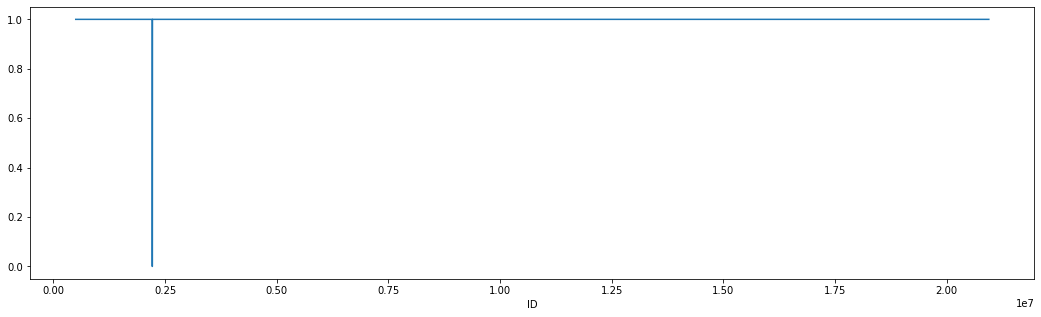

In [150]:
table.eq(table.iloc[:, 0], axis=0).all(1).plot(include_bool=True,figsize=(18,5))

In [174]:
table.iloc[:3]

Pregunta,Area -> Brazos,Area -> Cabeza,Area -> Piernas,Area -> Tronco,Descamación (escalado),Eritema (enrojecimiento),Induración (espesor)
ID,,,,,,,
501053,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51,2020-02-28 16:26:51
501389,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16,2020-02-28 14:30:16
501826,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00,2019-12-06 16:28:00


In [168]:
table.eq()

TypeError: f() missing 1 required positional argument: 'other'

In [175]:
table.iloc[:3].itertuples(index=False)

In [177]:
for row in table.iloc[:3].itertuples(index=False):
        print(row)
#table

Pandas(_0=Timestamp('2020-02-28 16:26:51'), _1=Timestamp('2020-02-28 16:26:51'), _2=Timestamp('2020-02-28 16:26:51'), _3=Timestamp('2020-02-28 16:26:51'), _4=Timestamp('2020-02-28 16:26:51'), _5=Timestamp('2020-02-28 16:26:51'), _6=Timestamp('2020-02-28 16:26:51'))
Pandas(_0=Timestamp('2020-02-28 14:30:16'), _1=Timestamp('2020-02-28 14:30:16'), _2=Timestamp('2020-02-28 14:30:16'), _3=Timestamp('2020-02-28 14:30:16'), _4=Timestamp('2020-02-28 14:30:16'), _5=Timestamp('2020-02-28 14:30:16'), _6=Timestamp('2020-02-28 14:30:16'))
Pandas(_0=Timestamp('2019-12-06 16:28:00'), _1=Timestamp('2019-12-06 16:28:00'), _2=Timestamp('2019-12-06 16:28:00'), _3=Timestamp('2019-12-06 16:28:00'), _4=Timestamp('2019-12-06 16:28:00'), _5=Timestamp('2019-12-06 16:28:00'), _6=Timestamp('2019-12-06 16:28:00'))


In [ ]:
table.loc[(table['all_last_date']==False)].shape

In [143]:
table.loc[(table['all_last_date']==True)]

Pregunta,Area -> Brazos,Area -> Cabeza,Area -> Piernas,Area -> Tronco,Descamación (escalado),Eritema (enrojecimiento),Induración (espesor),all_last_date
ID,,,,,,,,


In [ ]:
df_tf_g0=IDs_Unicos.groupby(['id','Modalidad cita'],as_index=True).count()['Fecha'].unstack('Modalidad cita')
df_tf_g0.fillna(0,inplace=True)
df_tf_g0['Terapias_totales']=df_tf_g0['Alta del Programa']+df_tf_g0['SEGUIMIENTO PRESENCIAL']
df_tf_g0

In [ ]:
df_tf_g0.groupby(['Terapias_totales']).sum().plot(kind='barh',figsize=(15,5))

In [ ]:
df_tf_g1=df_Terapia_fisica.groupby(['Frecuencia cita'],as_index=True).nunique()
df_tf_g1 #Mapeo de Frecuencia cita

In [ ]:
df_tf_g1_clean=df_Terapia_fisica.copy().sort_values(by=['id','Fecha'])
df_tf_g1_clean['Fecha_AMD']=df_tf_g1_clean['Fecha'].dt.floor('d')
df_tf_g1_clean.reset_index(inplace=True)
df_tf_g1_clean

In [ ]:
df_tf_g1_clean.loc[(df_tf_g1_clean['id']==1929622)&(df_tf_g1_clean['Fecha_AMD']=='2019-10-11')]

In [ ]:
df_tf_g1_clean.drop_duplicates(subset=['id','Fecha_AMD','Modalidad cita','Pregunta','Sí/No'],keep='first',inplace=True,ignore_index=True)

In [ ]:
df_tf_g1_clean.loc[(df_tf_g1_clean['id']==1929622)&(df_tf_g1_clean['Fecha_AMD']=='2019-10-11')]

In [ ]:
df_tf_g1_clean

In [ ]:
df_tf_g2=df_Terapia_fisica.groupby(['Modalidad cita'],as_index=True).nunique()
df_tf_g2 #Mapeo de Modalidad cita

In [ ]:
df_tf_g1_clean.loc[(df_tf_g1_clean['Modalidad cita']=='Alta del Programa')&(df_tf_g1_clean['Sí/No']=='SI')].groupby(['Modalidad cita','Pregunta']).nunique()

In [ ]:
df_tf_g1_clean.loc[(df_tf_g1_clean['Modalidad cita']=='SEGUIMIENTO PRESENCIAL')&(df_tf_g1_clean['Sí/No']=='SI')].groupby(['Modalidad cita','Pregunta']).nunique()

In [ ]:
df_tf_g3=df_Terapia_fisica.groupby(['Pregunta'],as_index=True).nunique()
df_tf_g3 #Mapeo de Pregunta

In [ ]:
df_tf_g4=df_Terapia_fisica.groupby(['Sí/No'],as_index=True).nunique()
df_tf_g4 #Mapeo de Sí/No

In [ ]:
df_tf_g5=df_Terapia_fisica.groupby(['Sede de atención'],as_index=True).nunique()
df_tf_g5 #Mapeo de Sede de atención

In [ ]:
print(df_Terapia_fisica.shape)
print(df_tf_g1_clean.shape)

In [ ]:
df_tf_g1_clean.drop(columns=['Tipo ID'],inplace=True)
df_tf_g1_clean

In [ ]:
df_tf_g1_clean['id'].nunique()

In [ ]:
df_tf_g1_clean.to_csv("data/Terapia_fisica_DF.csv", index = False)